## TikTok manuscript data analysis ##

### Clustering methods (unsupervised methods to find natural groupings within data) ###

In [67]:
# Import libraries
#   File management
from tkinter import filedialog  # For selecting files
import os  # For directory management
import glob
import shutil
#   Number, file, and image management
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np  # For array management
import pandas as pd  # For database management
import random
#   Plotting results
import matplotlib.pyplot as plt  # For plotting result data
from matplotlib import colors
import seaborn as sns
import datetime
import itertools

### Initial analysis ###

**Step 1: Import TikTok data from specific filepath, set up results directory**

In [2]:
# Local path
file = '/Users/meredithfay/Documents/PROJECT collaborations/Mo/Tiktok data analysis/Tiktok_data.xlsx'
directory = os.path.dirname(file)

In [9]:
# Create a "results" folder within the original directory to save results to
now = datetime.datetime.now()

# Create timestamped results directory
output_folder = os.path.join(directory, 'Clustering results, ' + now.strftime("%m_%d_%Y, %H_%M_%S"))
os.mkdir(output_folder)
os.chdir(output_folder)

# Print current working directory
# If you run this cell additional times, multiple directories will be created - results will be in most recent
print(os.getcwd())

/Users/meredithfay/Documents/PROJECT collaborations/Mo/Tiktok data analysis/Clustering results, 12_16_2022, 10_07_01


In [4]:
# Read data sheet
sheet = pd.read_excel(file, sheet_name='Data', engine='openpyxl')

In [5]:
# Print columns
print(sheet.columns)  # Some columns will have null values, remove as necessary

Index(['Name:', 'Date', 'Min. followers', 'Follower jump', 'Jump binary',
       'views', 'Video Length (s)', 'Average Watch time (s)',
       'Watched Full Video (%)', 'Reached Audience', 'likes', 'Comments',
       'shares', 'bookmarks', 'Engagement', 'For You (%)', 'Personal Profile',
       'Following (%)', 'Sound (%)', 'hashtag (%)', 'Promoted',
       'How long to film', 'Posted Time', 'David', 'Miku', 'Luyao', 'Mo',
       'Priscilla', 'Anjana', 'Alessandra', 'Adiya', 'Dozie', 'Lily', 'Nina',
       'New followers', 'Category'],
      dtype='object')


In [6]:
# Add column 'Time' representing number of days from start of account
sheet['Time'] = (sheet['Date'] - sheet['Date'].iloc[0]) / np.timedelta64(1, 'D')

In [7]:
# Check data types
sheet.dtypes

Name:                             object
Date                      datetime64[ns]
Min. followers                     int64
Follower jump                      int64
Jump binary                      float64
views                              int64
Video Length (s)                 float64
Average Watch time (s)           float64
Watched Full Video (%)           float64
Reached Audience                 float64
likes                            float64
Comments                           int64
shares                             int64
bookmarks                          int64
Engagement                         int64
For You (%)                      float64
Personal Profile                 float64
Following (%)                    float64
Sound (%)                        float64
hashtag (%)                      float64
Promoted                         float64
How long to film                   int64
Posted Time                       object
David                              int64
Miku            

In [8]:
# Check dataframe
sheet.head(10)

,Name:,Date,Min. followers,Follower jump,Jump binary,views,Video Length (s),Average Watch time (s),Watched Full Video (%),Reached Audience,...,Priscilla,Anjana,Alessandra,Adiya,Dozie,Lily,Nina,New followers,Category,Time
0,Oh no (sound trend),2021-11-05,0,0,NaN,875,34.06,NaN,NaN,NaN,...,0,1,1,0,0,0,0,NaN,1,0.0
1,Full house,2021-11-05,0,0,0.0,2380,61.95,NaN,NaN,NaN,...,1,1,1,1,1,0,0,NaN,3,0.0
2,Joe as a scientist,2021-11-05,0,0,0.0,926,35.11,NaN,NaN,NaN,...,0,0,0,0,1,0,0,NaN,1,0.0
3,P and M dance,2021-11-09,0,0,0.0,1614,10.45,6.3,19.22,2048.0,...,1,0,0,0,0,0,0,NaN,1,4.0
4,day in life of scientist,2021-11-12,0,0,0.0,730,8.33,7.8,53.34,800.0,...,0,0,0,0,0,0,0,NaN,1,7.0
5,PBS,2021-11-13,0,0,0.0,2236,12.74,10.3,47.76,2189.0,...,0,0,0,1,0,0,0,NaN,1,8.0
6,twinnenem,2021-11-16,0,0,0.0,699,12.30,12.3,58.94,660.0,...,0,0,0,0,0,0,0,NaN,1,11.0
7,dirty lab bench,2021-11-19,0,0,0.0,1056,14.12,8.9,24.22,1038.0,...,1,0,0,0,0,0,0,NaN,1,14.0
8,buggin ya boss,2021-11-23,0,0,0.0,674,6.62,8.9,61.86,635.0,...,1,1,1,0,0,0,0,NaN,3,18.0
9,Lab olympics intro,2021-11-27,0,0,0.0,899,38.45,17.5,16.46,841.0,...,1,1,1,1,1,0,0,NaN,3,22.0


#### Sample questions to answer using clustering ####

- Are some categories of videos more popular/impactful than others?
- Is some content/are some categories more educational than others? (e.g. are they saved more, or watched til completion more?) Do more educational videos widen the reach of the channel?
- Is there a form of engagement (i.e. likes, comments, shares, and/or bookmarks) that matters most to views or channel growth?
- Are any lab members more popular than others?
- What's unique about promoted videos?
- What's unique about videos that generate a large jump in followers?

**Plot some initial relationships**

*How has follower count changed over time?*

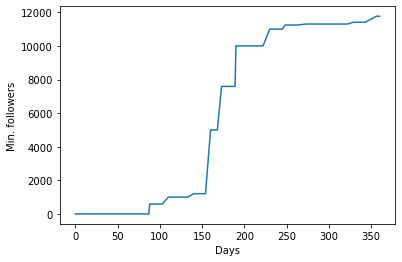

In [24]:
sns.lineplot(data=sheet, x='Time', y='Min. followers')
plt.xlabel('Days')
plt.savefig('MinFollowers_overtime.png', dpi=300)
plt.show()

*What videos caused a jump in followers?* 

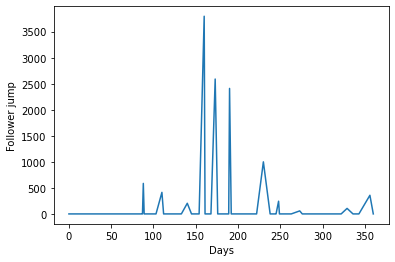

In [26]:
# Create a figure plotting jumps over time
sns.lineplot(data=sheet, x='Time', y='Follower jump')
plt.xlabel('Days')
plt.savefig('Jump_overtime.png', dpi=300)
plt.show()

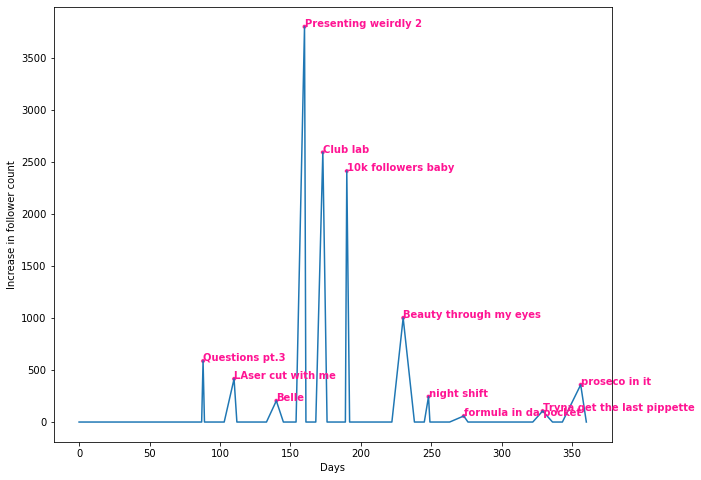

In [30]:
# Label this graph with the title of the video we assume lead to the jump
df_jump = sheet[sheet['Follower jump']>0]
plt.figure(figsize=(10,8))
sns.lineplot(data=sheet, x='Time', y='Follower jump')
p1 = sns.scatterplot(data=df_jump, x='Time', y='Follower jump', size=100, color='deeppink', legend=False)
plt.xlabel('Days')
plt.ylabel('Increase in follower count')

for i in range(len(df_jump)):
    p1.text(df_jump['Time'].iloc[i]+0.1, df_jump['Follower jump'].iloc[i], 
            df_jump['Name:'].iloc[i], horizontalalignment='left', size='medium', color='deeppink', weight='semibold')
        
plt.savefig('Jump_overtime_labeled.png', dpi=300)
plt.show()

### Clustering methods begin ###

Series of repeated steps designed to address each question. Steps include:
   - Select relevant columns
   - Plot pairwise relationships between columns
   - If relationships warrant further investigation, label interesting data points with video names
   - Generate correlation matrix to ensure machine learning features aren't highly correlated
   - Generate a scree plot to inform the number of mathematically significant clusters to retain
   - Perform Kmeans analysis, understood to be a general-purpose, robust clustering method
   - Calculate statistics to assess goodness of cluster, i.e. silhouette score
   - Plot clusters
   - Note interpretation

In [31]:
# Save numerical data with clusters to an excel sheet for later additional analysis
# Create excel writer
writer = pd.ExcelWriter('Clustering_analysis.xlsx', engine='openpyxl')  # To write excel sheets

In [46]:
# Create dataframe that silhouette scores will be saved to
df_sil = pd.DataFrame()

**Question 1: are some categories of videos more popular or impactful than others**

In [33]:
# Create a "name" for this analysis for saving files
analysis_name = 'Popular_categories'

In [35]:
# Select relevant columns from data frame
df = sheet[['Name:', 'Engagement', 'views', 'Category']]  # Edit, always include "Name:"

# Remove any rows with null values
df = df.dropna(how='any', axis=0)

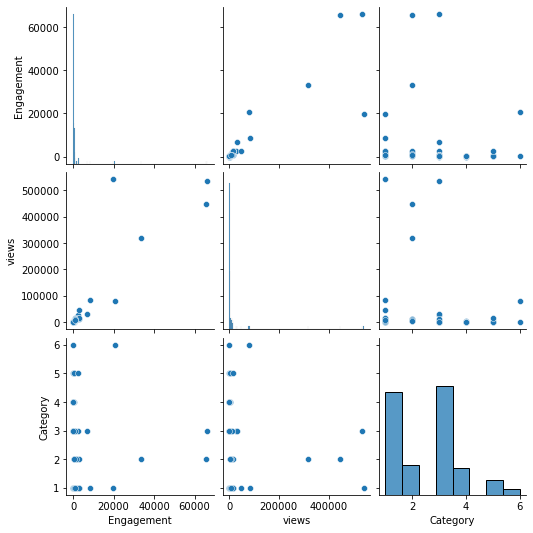

In [36]:
# Plot pairwise relationships between columns
# Display and save a pairplot showing relationships between features
sns.pairplot(df)
plt.savefig(analysis_name + '_pairplot.png', dpi=300)  # Save in results folder
plt.show()

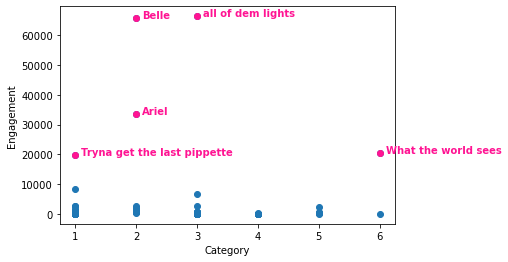

In [68]:
# Label interesting data points with video names
df_subset = df[df['Engagement']>17500]  # Edit condition
x_variable = 'Category' # Edit variables
y_variable = 'Engagement'
plt.xlabel(x_variable)
plt.ylabel(y_variable)
plt.scatter(x=df[x_variable], y=df[y_variable])  # All data points
plt.scatter(x=df_subset[x_variable], y=df_subset[y_variable], color='deeppink')  # Select data points

# Names, need to edit
for i in range(len(df_subset)):
    plt.text(df_subset[x_variable].iloc[i]+0.1, df_subset[y_variable].iloc[i], 
            df_subset['Name:'].iloc[i], horizontalalignment='left', size='medium', color='deeppink', weight='semibold')
        
plt.savefig(analysis_name + '_labeled-points.png', dpi=300)
plt.show()

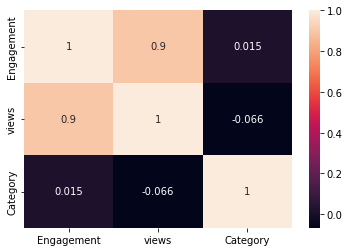

In [41]:
# Begin clustering: generate a correlation matrix
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.savefig(analysis_name + '_correlation-matrix.png', dpi=300)  # Save in results folder
plt.show()

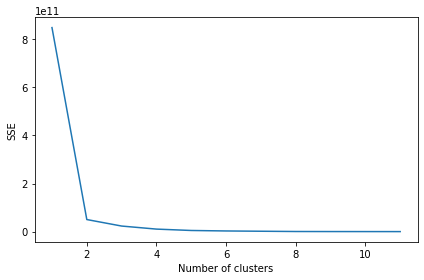

In [52]:
# Generate a scree plot
sse = {}
df_X = df.drop('Name:', axis=1) # Drop name so only numerical columns remain, this is the x block for analysis
df_scree = df_X.copy()  # Leave original X set unchanged
for k in range(1, 12):  # Range of 1 to 12 clusters, could easily edit
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_scree)
    df_scree["Clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.tight_layout()
plt.savefig(analysis_name + '_scree.png', dpi=300)

In [54]:
# Perform K-means analysis
k = 2  # Edit based on scree plot, looking for "elbow" point
# Partition clusters
kmeans = KMeans(n_clusters=k, random_state=100)
kmeans_labels = kmeans.fit_predict(df_X)  # Note each label will be an integer, starting at 0 (0, 1, 2.. etc.)

In [60]:
df_X['Label'] = kmeans_labels

In [61]:
# Calculate silhoutte score, save to list that will be saved as final analysis sheet
# -1 indicates poor clustering, 1 indicates perfect clustering
silhouette_coefficient = metrics.silhouette_score(df_X, kmeans_labels)
print("Silhouette coefficient: " + str(silhouette_coefficient))

dict_sc = {analysis_name : silhouette_coefficient}  # Dict
dict_df = pd.DataFrame(dict_sc, index=[0])  # Dataframe
df_sil = df_sil.append(dict_df, ignore_index=True)

Silhouette coefficient: 0.9676335805158067


In [62]:
# Plot clusters on pairwise graphs
# Create a 2D scatter plot of labels from all combinations of two features
graph_count = 1  # For saving figures

for pair in itertools.combinations(df_X.columns, 2):
    sns.scatterplot(data=df_X, x=pair[0], y=pair[1], hue='Label')  # Color: sample, shape: label
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.tight_layout()
    plt.savefig(analysis_name + '_paired-features_' + str(graph_count) + '.png', dpi=300)
    plt.close()
    graph_count +=1 # Some feature column names may contain unicode characters unsuitable for file names
    
# Users will need to sort through graphs to find interesting combinations

In [63]:
# Save data with cluster labels for further analysis, be sure to change excel sheet name to reflect question
df_with_labels = df.copy()
df_with_labels['Label'] = kmeans_labels
df_with_labels.to_excel(writer, sheet_name=analysis_name, index=False)

**Note interpretation for later reference**
- Clusters appear to be assigned mostly by follower count/engagement data. Videos in the high follower count/engagement data were in the trends (1), disney princesses (2), or an original skit (1) categories

**Final steps**

In [64]:
# Save silhoutte scores
df_sil.to_excel(writer, sheet_name='Silhouette scores', index=False)

In [65]:
# Save and close writer to export results excel
writer.save()
writer.close()

**Comments, questions, or concerns?** Check us out at @scieneers on tiktok and stay tuned for our peer-reviewed manuscript celebrating one year of outreach! In the meantime, please feel free to contact me at meredith.e.fay@gmail.com